In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Shubham@1234',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/91771/Desktop/Data Analyst/E commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

In [3]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 3.7 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/16.4 MB 3.9 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/16.4 MB 3.3 MB/s eta 0:00:05
   ------ --------------------------------- 2.6/16.4 MB 3.3 MB/s eta 0:00:05
   --------- ------------------------------ 3.9/16.4 MB 3.7 MB/s eta 0:00:04
   ----------- ---------------------------- 4.7/16.4 MB 3.8 MB/s eta 0:00:04
   ------------ --------------------------- 5.2/16.4 MB 3.8 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/16.4 MB 3.6 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/16.4 MB 3.4 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.4 MB 3.6 MB/s eta 0:00:03
   -------------------- ------------------- 8.4/16.4 MB 3.6 MB/s eta 0:00:03
   ----------

In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host= "localhost",
                             username="root",
                             password="Shubham@1234",
                             database="ecommerce")

cur = db.cursor()

# List all unique cities where ustomers are located

In [7]:
query=""" select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# count a number of orders placed in 2017

In [14]:
query=""" select count(order_id)  from  orders  where (order_purchase_timestamp)=2017"""

cur.execute(query)

data = cur.fetchall()
"total orders placed in 2017 are:",data[0][0]

('total orders placed in 2017 are:', 180404)

# Find the total sales per category

In [20]:
query=""" select products.product_category category, round(sum(payments.payment_value)) 
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id= order_items.order_id
group by category  """

cur.execute(query)

data = cur.fetchall()
data

df= pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,perfumery,4053909.0
1,Furniture Decoration,11441411.0
2,telephony,3895056.0
3,Fashion Bags and Accessories,1745266.0
4,bed table bath,13700429.0
...,...,...
69,cds music dvds,9595.0
70,La Cuisine,23308.0
71,Fashion Children's Clothing,6285.0
72,PC Gamer,17395.0


# Calculate the percentage of orders that were paid in installments.

In [25]:
query=""" select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()
data


[(Decimal('99.9981'),)]

#  Count the number of customers from each state.

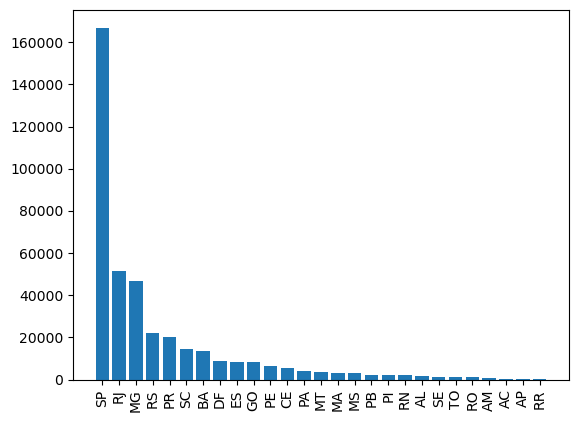

In [32]:
query=""" select customer_state, count(customer_id) 
from customers group by customer_state  """

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data, columns=["state", "customer_count"])
df = df.sort_values(by="customer_count",ascending=False)
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()

# Calculate the number of orders per month in 2018.

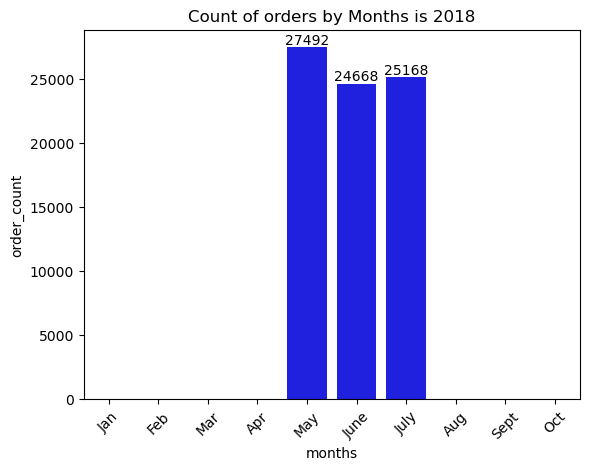

In [47]:
query=""" select monthname(order_purchase_timestamp) months ,count(order_id) order_count 
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data,columns=["months","order_count"])
o=["Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct"]

ax=sns.barplot(x=df["months"],y=df["order_count"], data=df,order=o,color="blue")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of orders by Months is 2018")

plt.show()
          


#  Find the average number of products per order, grouped by customer city.

In [52]:
query=""" with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders
"""

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data,columns=["customer city","average orders"])
df.head(5)

,customer city,average orders
0,fortim,4.00
1,cairu,4.00
2,epitaciolandia,4.00
3,urucania,4.00
4,brotas de macaubas,4.00


# Calculate the percentage of total revenue contributed by each product category.

In [62]:
query=""" select (products.product_category )category, 
round(sum(payments.payment_value)/(select sum(payment_value) from payments)*100,2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id= order_items.order_id
group by category  order by sales desc

"""

cur.execute(query)

data = cur.fetchall()
data

df= pd.DataFrame(data, columns = ["Category", "Sales"])
df.head(10)

,Category,Sales
0,bed table bath,42.79
1,HEALTH BEAUTY,41.41
2,computer accessories,39.61
3,Furniture Decoration,35.73
4,Watches present,35.71
5,sport leisure,34.78
6,housewares,27.35
7,automotive,21.30
8,Garden tools,20.95
9,Cool Stuff,19.48


# Calculate the year-over-year growth rate of total sales.

In [69]:
query="""with a as (select year (orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id=payments.order_id
group by years order by years)

select years, ((payment-lag(payment,1) over (order by years))/
lag(payment,1) over (order by years))*100 previous_year
from a
"""

cur.execute(query)

data = cur.fetchall()
data
df=pd.DataFrame(data,columns=["years","YOY % growth"])
df


,years,YOY % growth
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


# Identify the top 3 customers who spent the most money in each year.

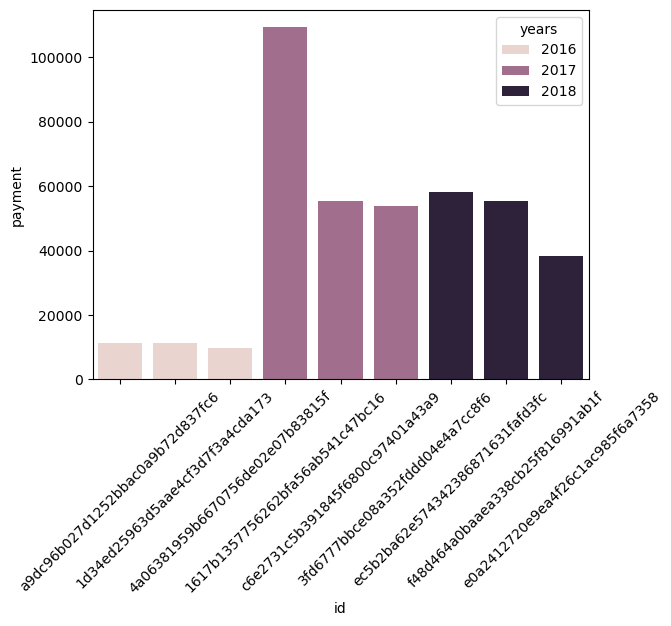

In [82]:
query="""select years,customer_id,payment,d_rank 
from 
(Select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a 
where d_rank<=3


"""

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data, columns=["years","id","payment","rank"])
sns.barplot(x="id",y= "payment",data=df,hue="years")
plt.xticks(rotation=45) 
plt.show()
             
             